In [ ]:
!pip install catboost
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 5.9 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score, mean_absolute_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

<ipython-input-5-c6cf1c106043>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')


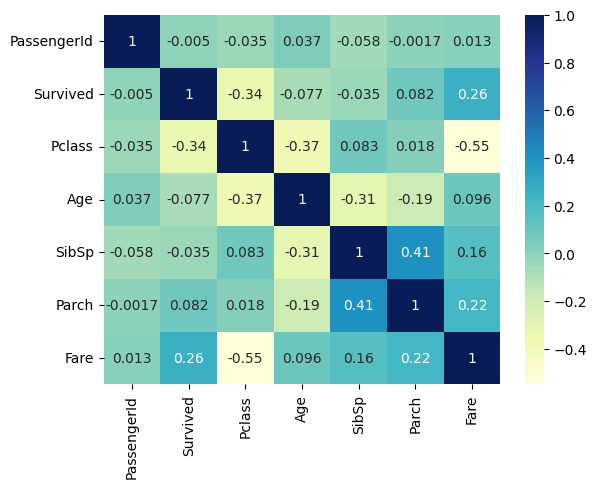

In [ ]:
sns.heatmap(train.corr(), annot=True, cmap='YlGnBu')
plt.show()

#Data preprocessing

#Let`s identify missed values in train set

In [ ]:
train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

We can clearly see that some features have missed values, in the train set, namely Age, Cabin and Ebarked

Let`s do the same for test set

In [ ]:
test.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

#In the test set, the missing values were identified with the same features as the train set has.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Let`s see the number of missing values in each data set.

In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#We can see that Age feature has 177 and Embarked has 2 missing values, while Cabin feature has over 70% of data are missing values, which means this feature should be removed from data set.

In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
train_data = train.drop(columns = ['Cabin'], axis=1)
test = test.drop(columns = ['Cabin'], axis=1)

Filling missing values with average numbers

In [ ]:
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

In [ ]:
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [ ]:
train_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
column_to_remove = ['Name', 'Ticket']
for column in column_to_remove:
  train_data = train_data.drop(columns = [column], axis=1)
  test = test.drop(columns = [column], axis=1)

In [ ]:
train_data['Embarked'] = train_data['Embarked'].astype('string')

In [ ]:
from sklearn.preprocessing import LabelEncoder
columns = ['Sex', 'Embarked']
le = LabelEncoder()
for col in columns:
  train_data[col] = le.fit_transform(train_data[col])
  test[col] = le.fit_transform(test[col])

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


#Training models

In [ ]:
X = train_data.drop(columns='Survived', axis=1)
y = train_data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#RandomForestClassifier

In [ ]:
rfc_d = RandomForestClassifier()
rfc_d.fit(X_train, y_train)
predict_rfc = rfc_d.predict(X_val)
print(f'Accuracy: {rfc_d.score(X_train, y_train)}')
print(f'Accuracy: {rfc_d.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, predict_rfc)}')

Accuracy: 1.0
Accuracy: 0.8268156424581006
MAE: 0.17318435754189945


#LogisticRegression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_val)
print(f'Accuracy: {lr.score(X_train, y_train)}')
print(f'Accuracy: {lr.score(X_val, y_val)}')
print(f'R2_score: {r2_score(y_val, y_pred)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred)}')

Accuracy: 0.7893258426966292
Accuracy: 0.770949720670391
R2_score: 0.05546975546975541
MAE: 0.22905027932960895


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#KNeighborsClassifier

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
y_prediction = knc.predict(X_val)
print(f'Accuracy of train set: {knc.score(X_train, y_train)}')
print(f'Accuracy of validation set: {knc.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, y_prediction)}')

Accuracy of train set: 0.7542134831460674
Accuracy of validation set: 0.659217877094972
MAE: 0.3407821229050279


#DecisionTreeClassifier

In [ ]:
dc = DecisionTreeClassifier()
dc.fit(X_train, y_train)
y_pred_dc = dc.predict(X_val)
print(f'Accuracy of train set: {dc.score(X_train, y_train)}')
print(f'Accuracy of validation set: {dc.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred_dc)}')

Accuracy of train set: 1.0
Accuracy of validation set: 0.7597765363128491
MAE: 0.24022346368715083


#CatBoostClassifier

In [ ]:
cbc = CatBoostClassifier()
cbc.fit(X_train, y_train)
y_pred_cbc = cbc.predict(X_val)
print(f'Accuracy of train set: {cbc.score(X_train, y_train)}')
print(f'Accuracy of validation set: {cbc.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred_cbc)}')

Learning rate set to 0.008911
0:	learn: 0.6868984	total: 49.1ms	remaining: 49.1s
1:	learn: 0.6816018	total: 50.7ms	remaining: 25.3s
2:	learn: 0.6755468	total: 52.2ms	remaining: 17.3s
3:	learn: 0.6704337	total: 53.4ms	remaining: 13.3s
4:	learn: 0.6646179	total: 55.2ms	remaining: 11s
5:	learn: 0.6590057	total: 56.5ms	remaining: 9.36s
6:	learn: 0.6543053	total: 58ms	remaining: 8.22s
7:	learn: 0.6488364	total: 59.4ms	remaining: 7.36s
8:	learn: 0.6444289	total: 60.2ms	remaining: 6.63s
9:	learn: 0.6392249	total: 61.6ms	remaining: 6.09s
10:	learn: 0.6340299	total: 63ms	remaining: 5.66s
11:	learn: 0.6286674	total: 64.2ms	remaining: 5.29s
12:	learn: 0.6252728	total: 65.2ms	remaining: 4.95s
13:	learn: 0.6226240	total: 66ms	remaining: 4.65s
14:	learn: 0.6177337	total: 67.4ms	remaining: 4.42s
15:	learn: 0.6136192	total: 68.8ms	remaining: 4.23s
16:	learn: 0.6095021	total: 70.4ms	remaining: 4.07s
17:	learn: 0.6055849	total: 71.9ms	remaining: 3.92s
18:	learn: 0.6015825	total: 73.3ms	remaining: 3.79s


#GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=2, min_samples_split=5)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_val)
print(f'Accuracy of train set: {gbc.score(X_train, y_train)}')
print(f'Accuracy of validation set: {gbc.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred_gbc)}')

Accuracy of train set: 0.8553370786516854
Accuracy of validation set: 0.8268156424581006
MAE: 0.17318435754189945


#XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_val)
print(f'Accuracy of training set: {xgb.score(X_train, y_train)}')
print(f'Accuracy of validation set: {xgb.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, y_pred_xgb)}')

Accuracy of training set: 0.9985955056179775
Accuracy of validation set: 0.776536312849162
MAE: 0.22346368715083798


After checking the accuracy of numerous algorithms, it was decided to choose RandomForestClassifier, as it has better accuracy among other type of algorithms.

In [ ]:
rfc = RandomForestClassifier(n_estimators=700, max_depth=12, min_samples_split=21)
rfc.fit(X_train, y_train)
predict = rfc.predict(X_val)
print(f'Accuracy: {rfc.score(X_train, y_train)}')
print(f'Accuracy: {rfc.score(X_val, y_val)}')
print(f'MAE: {mean_absolute_error(y_val, predict)}')

Accuracy: 0.875
Accuracy: 0.8212290502793296
MAE: 0.1787709497206704


In [ ]:
rfc = RandomForestClassifier(n_estimators=700, max_depth=12, min_samples_split=21)
rfc.fit(X, y)
predict = rfc.predict(test)

In [ ]:
def submission(prediction):
  submission = pd.DataFrame()
  submission['PassengerId'] = test['PassengerId']
  submission['Survived'] = prediction
  submission.to_csv('Titanic.csv', index=False, sep=',')

In [ ]:
submission(predict)